In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt                        
%matplotlib inline   
from glob import glob

The two png-files were created with the same resolution as the video: 848x480.
So for the first step no image carving, streching, etc. will be necessary.

In [2]:
#path to videos folder
path_mp4_videos = ".\\videos\\*.mp4"
list_videos = glob(path_mp4_videos)
print (len(list_videos))
print (list_videos[0])
#a white rectangle, which will be used for the weighted add
path_png4weighted = ".\\w4.png"
#a "watermark" writing, for full cover
path_png4add = ".\\w5.png"
#folder for the outputdata
###
path_datafolder_pureimage = ".\\pure4\\"
path_datafolder_watermarked = ".\\watermarked4\\"
###To do
#if the folder doesn't exist, create one
if not os.path.exists(path_datafolder_pureimage):
    os.makedirs(path_datafolder_pureimage)
if not os.path.exists(path_datafolder_watermarked):
    os.makedirs(path_datafolder_watermarked)

1
.\videos\video1.mp4


__Below:__ The first frame of the video

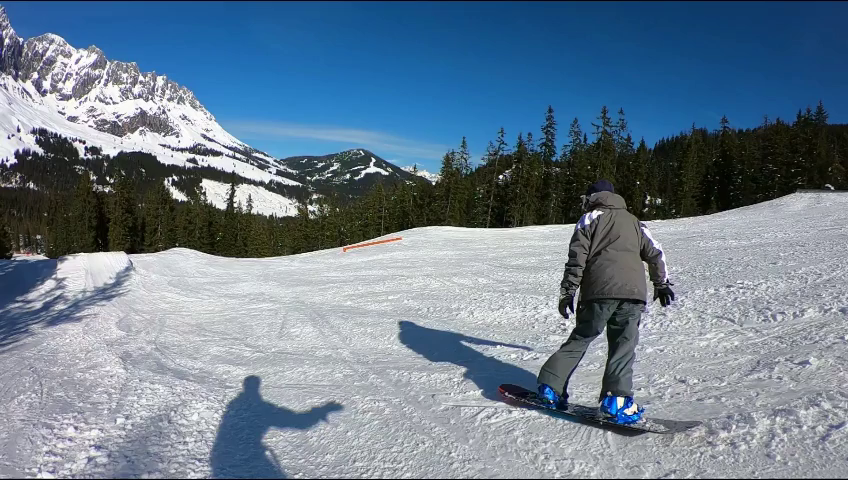

__Below:__ The first frame of the video with the noise

 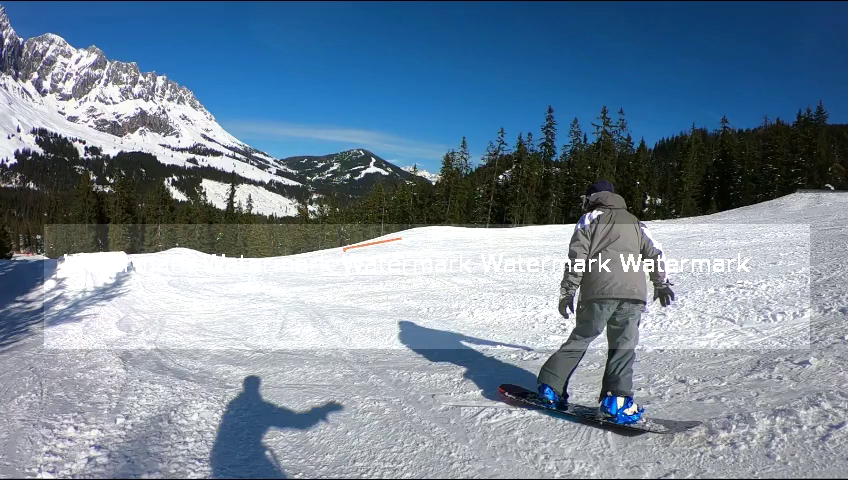

In [3]:
img_4weighted = cv2.imread(path_png4weighted)
img_wm_text = cv2.imread(path_png4add)
index = 0

for video in list_videos:
    cap = cv2.VideoCapture(video)
    while(cap.isOpened()):
        index+=1
        ret, image = cap.read()
        if ret == True:
            dst = cv2.addWeighted(image,1,img_4weighted,0.15,0)
            dst = cv2.add(dst,img_wm_text)
            cv2.imwrite(path_datafolder_pureimage+"frame"+str(index)+".png",image)
            cv2.imwrite(path_datafolder_watermarked+"blend"+str(index)+".png",dst) 
        else:
            break


__Split image into pieces:__
Since I'm using a GPU with 4GB RAM the deapth of my model is limited. So I'll split one image into 4 subimages

In [39]:
#path_datafolder_pureimage = ".\\pure4\\"
#path_datafolder_watermarked = ".\\watermarked4\\"
count_pieces = 4
for split in range(1,count_pieces+1):
    if not os.path.exists(path_datafolder_pureimage+"splt"+str(split)):
        os.makedirs(path_datafolder_pureimage+"splt"+str(split))
    if not os.path.exists(path_datafolder_watermarked+"splt"+str(split)):
        os.makedirs(path_datafolder_watermarked+"splt"+str(split))

The Parameters of the next codeblock must be adapt to used imagesize

In [46]:
for im in  glob(path_datafolder_pureimage+"*.png"):
    im2split = cv2.imread(im)
    imname = im[im.find("frame"):]
    for i in range(count_pieces):
        cv2.imwrite(path_datafolder_pureimage+"splt"+str(i+1)+"\\"+imname,im2split[:,(212*i):(212*i)+212,:]) # adapt slicing borders as a function to image size
        

In [47]:
for im in  glob(path_datafolder_watermarked+"*.png"):
    im2split = cv2.imread(im)
    imname = im[im.find("blend"):]
    for i in range(count_pieces):
        cv2.imwrite(path_datafolder_watermarked+"splt"+str(i+1)+"\\"+imname,im2split[:,(212*i):(212*i)+212,:]) # adapt slicing borders as a function to image size
 

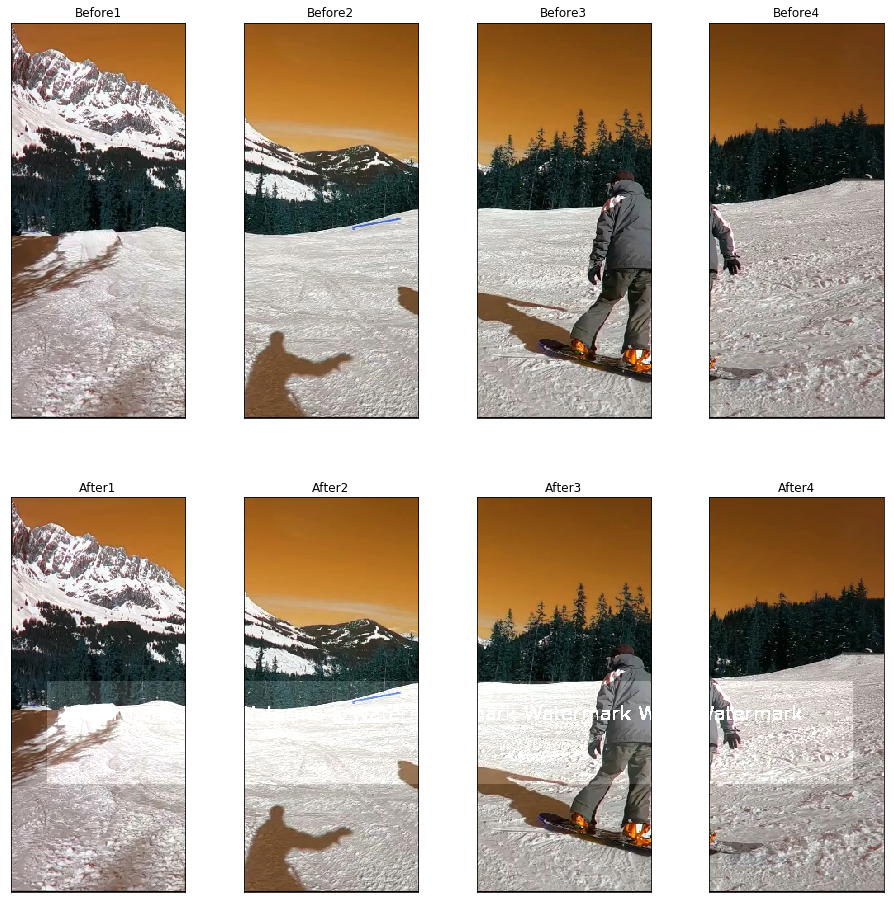

In [51]:
##print
pure1_1 = path_datafolder_pureimage+"splt1\\frame1.png"
pure1_2 = path_datafolder_pureimage+"splt2\\frame1.png"
pure1_3 = path_datafolder_pureimage+"splt3\\frame1.png"
pure1_4 = path_datafolder_pureimage+"splt4\\frame1.png"

pure_list = [pure1_1,pure1_2,pure1_3,pure1_4]

wm1_1 = path_datafolder_watermarked+"splt1\\blend1.png"
wm1_2 = path_datafolder_watermarked+"splt2\\blend1.png"
wm1_3 = path_datafolder_watermarked+"splt3\\blend1.png"
wm1_4 = path_datafolder_watermarked+"splt4\\blend1.png"

wm_list = [wm1_1,wm1_2,wm1_3,wm1_4]

fig = plt.figure(figsize=(16,16))
for ind in range(4):
    ax = fig.add_subplot(2,4,ind+1,xticks=[], yticks=[])
    plt.imshow(cv2.imread(pure_list[ind]))
    ax.set_title('Before'+str(ind+1))

    ax = fig.add_subplot(2,4,ind+5,xticks=[], yticks=[])
    plt.imshow(cv2.imread(wm_list[ind]))
    ax.set_title('After'+str(ind+1))
        

    